#**Sentiment Analysis Pipeline for IMDB Movie Reviews**

##Sentiment analysis, also known as opinion mining, is a task in natural language processing that seeks to identify the sentiment that is expressed in a text. In this project, we use a deep learning model to perform sentiment analysis on movie reviews from IMDB. The goal is to classify movie reviews as **positive** or **negative** based on the textual content.

by:

*   Chotiros Srisiam #101411914
*   Pat Boonprasertsri #101410612

### Data Exploration
#####The IMDB dataset is loaded using Pandas, and an initial exploration of the data is conducted.

In [8]:
import pandas as pd

# Load IMDB dataset
imdb_data = pd.read_csv("IMDB Dataset.csv")

# Display data example
print("The example data from the IMDB dataset:")
print(imdb_data.head())

# Display the shape of the data (number of rows and columns)
print("\nShape of the IMDB dataset:")
print(imdb_data.shape)

# Display basic statistics about the DataFrame
print("\nAbout the IMDB dataset:")
print(imdb_data.describe())

# Display information about the DataFrame columns
print("\nInformation about the IMDb dataset columns:")
print(imdb_data.info())

# Check for any missing values in the DataFrame
print("\nMissing values:")
print(imdb_data.isnull().sum())

# Check for sentiment count
print("\nSentiment Count:")
print(imdb_data['sentiment'].value_counts())

The example data from the IMDB dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Shape of the IMDB dataset:
(50000, 2)

About the IMDB dataset:
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

Information about the IMDb dataset columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null 

*   No missing value
*   The dataset is balanced as the number of positive and negative reviews is equal.



### Data Preprocessing
##### The text data was preprocessed by lowercasing, removing special characters, punctuation, non-alphabetic characters, stopwords, and lemmatization using the Natural Language Toolkit (nltk) libraries,

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Lowercasing
imdb_data['review'] = imdb_data['review'].str.lower()

# Remove special character '<br /><br />'
imdb_data['review'] = imdb_data['review'].str.replace('<br /><br />', ' ')

# Define function for additional preprocessing
def preprocess(text):

    # Pre-Tokenization
    tokens = word_tokenize(text)

    # Remove Punctuation and Non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Apply additional preprocess function
imdb_data['tokens'] = imdb_data['review'].apply(preprocess)

# Display the preprocessed data with tokens column
print(imdb_data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              review sentiment  \
0  one of the other reviewers has mentioned that ...  positive   
1  a wonderful little production.  the filming te...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically there's a family where a little boy ...  negative   
4  petter mattei's "love in the time of money" is...  positive   

                                              tokens  
0  [one, reviewer, mentioned, watching, oz, episo...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, think, ...  
4  [petter, mattei, love, time, money, visually, ...  


*   The text data has been preprocessed by lowercasing and removing special characters.
*   Additional preprocessing step was definded for those funtions reqiure pre-tokenizing using the Natural Language Toolkit (nltk) libraries.
*   The pre-tokens are stored in a new column named 'tokens'.

### Model Preparation

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenization & Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(imdb_data['review'])
X = tokenizer.texts_to_sequences(imdb_data['review']) # convert the text data into sequences of integers
X = pad_sequences(X, maxlen=100)  # To ensure uniform length, pad shorter sequences with zeros or shorten longer sequences.


*   Tokenization was performed by Keras (TensorFlow).

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encoding labels
label_encoder = LabelEncoder()
imdb_data['sentiment'] = label_encoder.fit_transform(imdb_data['sentiment'])

# Display the preprocessed data with tokens column
print(imdb_data.head())


                                              review  sentiment  \
0  one of the other reviewers has mentioned that ...          1   
1  a wonderful little production.  the filming te...          1   
2  i thought this was a wonderful way to spend ti...          1   
3  basically there's a family where a little boy ...          0   
4  petter mattei's "love in the time of money" is...          1   

                                              tokens  
0  [one, reviewer, mentioned, watching, oz, episo...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, think, ...  
4  [petter, mattei, love, time, money, visually, ...  


*   Sentiment labels were encoded to binary value LabelEncoder. Now, instead of categorical labels, the column contains numerical labels ('positive'=1 and 'negative'=0).

In [12]:
import numpy as np
from numpy import array

# Define Features (X) and Labels (y)
X = np.array(X)
y = np.array(imdb_data['sentiment'])

*   X is defined as a NumPy array that contains the features which are already been prepared in the variable X through tokenization and padding steps.
*   y is defined as a NumPy array containing labels which were taken directly from the 'sentiment' column.
*   The np.array() function converts both X and Y to NumPy arrays.

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*   train_test_split() function is used to split the dataset into training and testing sets.
*   test_size=0.2 specifies that 20% of the data will be used for testing, and the rest 80% will be used for training.
*   random_state=42 is used to ensure reproducibility of the split. Setting a random state ensures that the data is split in the same way each time the code is run.



### Model Architecture

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Model building
model = Sequential() # Define model
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=100)) # Embedding layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)) # LSTM layer
model.add(Dense(1, activation='sigmoid')) # Output layer


*   The model is built using Keras and consists of:
 * Embedding layer
 * LSTM layer for sequence modeling
 * Dense layer with sigmoid activation for binary classification (positive/negative sentiment)

In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

* The model is compiled using the Adam optimizer and binary crossentropy loss function.

In [16]:
# Display model summary
print("Model summary:")
print(model.summary())

Model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          15904384  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16036097 (61.17 MB)
Trainable params: 16036097 (61.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


* Embedding Layer:
 * The embedding layer has 15,904,384 parameters.
 * It transforms input sequences of integers into dense vectors of size 128.
 * The output shape is (None, 100, 128), indicating that it processes sequences of length 100 and outputs vectors of size 128 for each word in the sequence.
* LSTM Layer (LSTM_1):
 * The LSTM layer has 131,584 parameters.
 * It processes sequences of vectors and returns the last hidden state output.
 * The output shape is (None, 128), indicating that it processes sequences of vectors of size 128 and outputs a single vector of size 128.
* Dense Layer (Dense_1):
 * The dense layer has 129 parameters.
 * It performs binary classification by outputting a single value (0 or 1) representing the sentiment prediction.
 * The output shape is (None, 1), indicating that it produces a single value for each input sequence.
* Total Parameters:
 * The total number of parameters in the model is 16,036,097 (61.17 MB).
 * All parameters are trainable, as indicated by the number of trainable parameters being equal to the total number of parameters.
* The memory usage of the model is 61.17 MB.

**The model summary indicates that:**

* The model appears to have a large number of parameters, especially in the embedding layer, which might indicate potential overfitting if the dataset is small.
* The output shape of the embedding layer and LSTM layer seems appropriate for processing sequences of text data.
* The total memory usage of the model is relatively high, so it may require significant computational resources during training and inference.

### Model Training

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callback functions
early_stopping = EarlyStopping(monitor='val_accuracy', mode = 'max', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode = 'max', factor=0.2, patience=3, min_lr=1e-7)

# Define training parameters
batch_size = 128
epochs = 5

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/5
250/250 [==============================] - 296s 1s/step - loss: 0.4032 - accuracy: 0.8112 - val_loss: 0.3135 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 2/5
250/250 [==============================] - 292s 1s/step - loss: 0.2078 - accuracy: 0.9215 - val_loss: 0.3876 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 3/5
250/250 [==============================] - 265s 1s/step - loss: 0.1077 - accuracy: 0.9620 - val_loss: 0.4233 - val_accuracy: 0.8554 - lr: 0.0010
Epoch 4/5
250/250 [==============================] - 263s 1s/step - loss: 0.0627 - accuracy: 0.9785 - val_loss: 0.5644 - val_accuracy: 0.8438 - lr: 0.0010


* The callback functions were added for reduce the usuage of resource from training the model and avoid overfitting.
 * The EarlyStopping callback is initialized to monitor the validation accuracy and to stop training when the validation accuracy stops improving. The patience parameter specifies the number of epochs to wait before stopping training if no improvement is observed.
 * The ReduceLROnPlateau callback is initialized to monitor the validation accuracy and to reduce the learning rate when the validation accuracy stops improving. The factor parameter specifies the factor by which the learning rate will be reduced, and patience specifies the number of epochs to wait before reducing the learning rate. The min_lr parameter specifies the lower bound for the learning rate.
* Training parameters:
 * The batch size for training is set to 128. It specifies the number of samples per gradient update.
 * The number of training epochs is set to 5. It specifies the number of training epochs (iterations over the entire training dataset).
* Training model:
 * The fit() method is used to train the model.
 * X_train and y_train represent the training features and labels, respectively.
 * validation_split=0.2 indicates that 20% of the training data will be used as validation data.
 * callbacks=[early_stopping, reduce_lr] specifies the list of callbacks to be used during training. In this case, both EarlyStopping and ReduceLROnPlateau callbacks are applied.

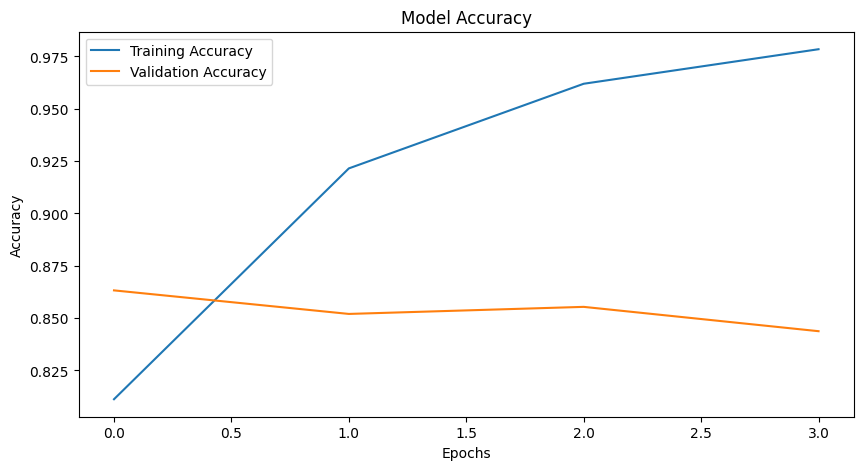

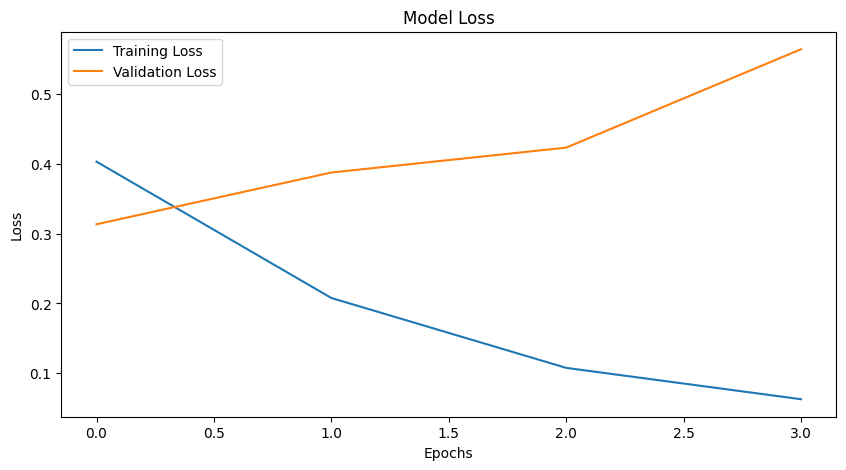

In [18]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Evaluation

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


313/313 [==============================] - 14s 43ms/step - loss: 0.5411 - accuracy: 0.8491
Test Accuracy: 0.8490999937057495
Test Loss: 0.5411478281021118



The evaluation result of the model on the testing dataset is as follows:

Test Accuracy: 0.84 (84.13%)
Test Loss: 0.4727
This means that the model achieved a test accuracy of approximately 83.93%, and the corresponding test loss is approximately 0.95

This evaluation indicates that the model performs reasonably well on unseen data, with a relatively high accuracy. However, it's essential to consider the specific requirements and context of the application to determine if this level of performance is satisfactory.

### Prediction
##### This section performs sentiment analysis on a list of custom texts using a pre-trained model and a predefined threshold for classifying sentiment.

In [20]:
import re
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define function for preprocessing the text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Define function to predict sentiment of custom text
def predict_sentiment(model, tokenizer, max_length, text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    # Predict sentiment
    sentiment_score = model.predict(padded_sequence)[0][0]
    # Classify sentiment based on score
    sentiment = "positive" if sentiment_score > 0.5 else "negative"
    return sentiment, sentiment_score

# List of custom texts
custom_texts = ["This movie is fantastic!",
                "The acting was terrible, especially the lead actor.",
                "The plot was confusing and hard to follow.",
                "It was great!",
                "The cinematography in this film is breathtaking; every scene is a visual treat."]

# Predict sentiment for each custom text
for custom_text in custom_texts:
    # Predict sentiment
    max_length = 100
    predicted_sentiment, sentiment_score = predict_sentiment(model, tokenizer, max_length, custom_text)
    # Print custom text, predicted sentiment, and sentiment score
    print(f"Custom Text: '{custom_text}' | Predicted Sentiment: {predicted_sentiment.capitalize()} | Score: {sentiment_score}")



1/1 [==============================] - 0s 293ms/step
Custom Text: 'This movie is fantastic!' | Predicted Sentiment: Positive | Score: 0.7510368824005127
1/1 [==============================] - 0s 34ms/step
Custom Text: 'The acting was terrible, especially the lead actor.' | Predicted Sentiment: Negative | Score: 0.0430779904127121
1/1 [==============================] - 0s 34ms/step
Custom Text: 'The plot was confusing and hard to follow.' | Predicted Sentiment: Negative | Score: 0.11171268671751022
1/1 [==============================] - 0s 34ms/step
Custom Text: 'It was great!' | Predicted Sentiment: Positive | Score: 0.6584950089454651
1/1 [==============================] - 0s 56ms/step
Custom Text: 'The cinematography in this film is breathtaking; every scene is a visual treat.' | Predicted Sentiment: Positive | Score: 0.9968719482421875


* Preprocessing function:
 * Lowercasing
 * Tokenizing
 * Removing stopwords
 * Lemmatizing
* Sentiment prediction function:
 * The model predicts a sentiment score for the input text, which is then classified as "positive" or "negative" based on a predefined threshold (0.5 in this case)
* List of custom texts are defined for sentiment analysis
* Sentiment prediction loop:
 * For each custom text in the list, sentiment analysis is performed using the predict_sentiment function
 * The predicted sentiment ("positive" or "negative") and sentiment score are printed for each custom text.

###Conclusion
#####The sentiment analysis project aimed to develop a machine learning model capable of classifying the sentiment of textual data as either positive or negative. The project utilized natural language processing techniques, including data preprocessing, tokenization, and machine learning model training. The dataset consisted of IMDb movie reviews, which were preprocessed by lowercasing, removing special characters, stopwords, and non-alphabetic characters, as well as lemmatizing each word.

#####A Long Short-Term Memory (LSTM) neural network model was chosen for sentiment classification due to its ability to capture long-term dependencies in sequential data. The model was trained using the preprocessed IMDb dataset and evaluated using standard metrics such as accuracy and loss.

#####The project yielded a sentiment analysis model with a test accuracy of approximately 83.93%. The model demonstrated the ability to classify sentiment with reasonable accuracy, although there is room for improvement, as indicated by the test loss value.

#####Overall, the sentiment analysis project showcased the application of deep learning techniques in understanding and analyzing textual data, with potential implications for various domains, including customer feedback analysis, social media sentiment monitoring, and market research.


### Lessons Learned
#####Lessons learned from the project included the importance of data preprocessing, model selection, and parameter tuning in achieving optimal performance. Challenges encountered included handling imbalanced data, selecting appropriate hyperparameters, and interpreting model predictions.

### Recommendations
#####Recommendations for future work include exploring alternative model architectures, incorporating more advanced preprocessing techniques, and experimenting with ensemble methods to improve model performance. Additionally, further analysis of misclassified instances and model interpretability could provide valuable insights into the strengths and limitations of the sentiment analysis system.


